*To be run on Sage kernel, with eel installed*

In [2]:
from hourglass import HourglassPlabicGraph as HPG

# retreive example data for cons tructor 
from examples import example_2, example_1, benzene_debug, benzene_and_square
g1, g2, bns, bd = example_1(), example_2(), benzene_and_square(), benzene_debug()

blank_1 = HPG()
blank_2 = HPG()

In [ ]:
blank_1.editor()

In [6]:
blank_2.editor()

Editor closed.


In [10]:
blank_1

In [12]:
(blank_1 == blank_2)

True

In [4]:
iso = blank_1.isomorphism(blank_1)

In [5]:
from pprint import pprint as pp
pp(iso)

{'edges': {(0, 1, 1): (0, 1, 1),
           (0, 5, 1): (0, 5, 1),
           (1, 0, 1): (1, 0, 1),
           (1, 5, 1): (1, 5, 1),
           (2, 3, 1): (2, 3, 1),
           (2, 7, 1): (2, 7, 1),
           (3, 2, 1): (3, 2, 1),
           (3, 7, 1): (3, 7, 1),
           (5, 0, 1): (5, 0, 1),
           (5, 1, 1): (5, 1, 1),
           (5, 7, 2): (5, 7, 2),
           (7, 2, 1): (7, 2, 1),
           (7, 3, 1): (7, 3, 1),
           (7, 5, 2): (7, 5, 2)},
 'vertices': {0: 0, 1: 1, 2: 2, 3: 3, 5: 5, 7: 7}}


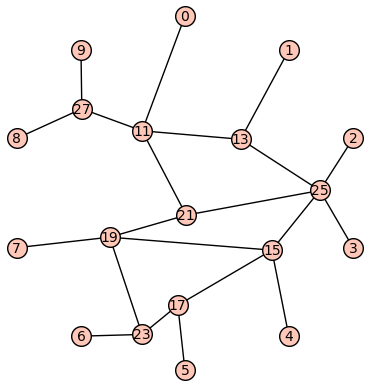

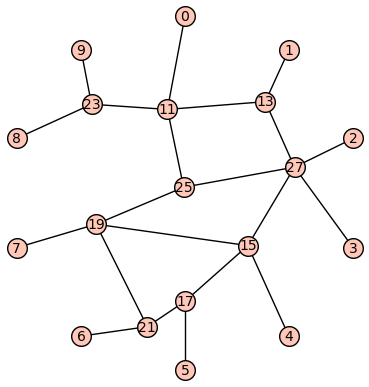

In [18]:
blank_1.conv_to_sage().show()
blank_2.conv_to_sage().show()